In [36]:
import pandas as pd

### Y : energy

In [37]:
df_energy = pd.read_csv('data\energy_dataset.csv')
sorted(df_energy.columns)

['forecast solar day ahead',
 'forecast wind offshore eday ahead',
 'forecast wind onshore day ahead',
 'generation biomass',
 'generation fossil brown coal/lignite',
 'generation fossil coal-derived gas',
 'generation fossil gas',
 'generation fossil hard coal',
 'generation fossil oil',
 'generation fossil oil shale',
 'generation fossil peat',
 'generation geothermal',
 'generation hydro pumped storage aggregated',
 'generation hydro pumped storage consumption',
 'generation hydro run-of-river and poundage',
 'generation hydro water reservoir',
 'generation marine',
 'generation nuclear',
 'generation other',
 'generation other renewable',
 'generation solar',
 'generation waste',
 'generation wind offshore',
 'generation wind onshore',
 'price actual',
 'price day ahead',
 'time',
 'total load actual',
 'total load forecast']

dropping useless features

In [38]:
useless_energy_features = ['forecast solar day ahead',
 'forecast wind offshore eday ahead',
 'forecast wind onshore day ahead',
 'price day ahead',
 'total load actual',
 'total load forecast',
 
 # NaN
 'generation geothermal',
 'generation marine',
 ]
 
df_energy.drop(useless_energy_features, axis=1, inplace=True, )

replacing NaNs

In [39]:
df_energy.isnull().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                                  18
generation waste                                  19
generation wind offshore                      

In [40]:
df_energy.sort_values('time', inplace = True, )
df_energy.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

merging similar features

In [41]:
fossil_features = [
    'generation fossil brown coal/lignite',
    'generation fossil coal-derived gas',
    'generation fossil gas',
    'generation fossil hard coal',
    'generation fossil oil',
    'generation fossil oil shale',
    'generation fossil peat',
 ]

df_energy['generation fossil'] = df_energy[fossil_features].sum(axis = 1)
df_energy.drop(fossil_features, axis=1, inplace=True, )

In [42]:
hydro_features = [
    'generation hydro pumped storage aggregated',
    'generation hydro pumped storage consumption',
    'generation hydro run-of-river and poundage',
    'generation hydro water reservoir',
 ]

df_energy['generation hydro'] = df_energy[hydro_features].sum(axis = 1)
df_energy.drop(hydro_features, axis=1, inplace=True, )

In [43]:
wind_features = [
    'generation wind offshore',
    'generation wind onshore',
    ]

df_energy['generation wind'] = df_energy[wind_features].sum(axis = 1)
df_energy.drop(wind_features, axis=1, inplace=True, )

define features group

In [44]:
nonrenew_features = [
    'generation fossil',
    'generation other',
    'generation nuclear',
    'generation waste',
 ]

renewable_features = [
 'generation biomass',
 'generation hydro',
 'generation other renewable',
 'generation solar',
 'generation wind'
 ]

In [45]:
total_pop = 15272043
weights = {
    'Madrid': 6155116 / total_pop,
    'Barcelona': 5179243 / total_pop,
    'Valencia': 1645342 / total_pop,
    'Seville': 1305342 / total_pop,
    'Bilbao': 987000 / total_pop
    }

In [46]:
# for city, weight in weights.items():    
#     for feature in features_list:
#         df_en[feature + ' ' + city] = df_en[feature]*weight

In [47]:
# df_energy['time'] = pd.to_datetime(df_energy['time'], utc=True, infer_datetime_format=True)
# df_energy = df_energy.set_index('time')

### X : weather

In [48]:
df_weather = pd.read_csv('data\weather_features.csv')
sorted(df_weather.columns)

['city_name',
 'clouds_all',
 'dt_iso',
 'humidity',
 'pressure',
 'rain_1h',
 'rain_3h',
 'snow_3h',
 'temp',
 'temp_max',
 'temp_min',
 'weather_description',
 'weather_icon',
 'weather_id',
 'weather_main',
 'wind_deg',
 'wind_speed']

In [49]:
df_weather.drop_duplicates(subset=['dt_iso', 'city_name'], keep='first', inplace = True, )

In [50]:
useless_weather_features = [
    'weather_id', 
    'weather_main', 
    'weather_icon', 
    'weather_description',
    ]
df_weather.drop(useless_weather_features, axis=1, inplace=True, )

In [51]:
weather_list = [ 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all', 'weather_description',
       ]

sulla fiducia

In [52]:
import numpy as np

In [53]:
df_weather.loc[df_weather.pressure > 1051, 'pressure'] = np.nan
df_weather.loc[df_weather.pressure < 931, 'pressure'] = np.nan
df_weather.loc[df_weather.wind_speed > 50, 'wind_speed'] = np.nan

In [54]:
df_weather.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

encoding `weather_description`

In [55]:
# extract token words
# weather_tokens = {w for l in df_weather.weather_description for w in l.split()}
# weather_tokens.difference_update(['and', 'with', 'is', ])
# weather_tokens

# TODO PCA per alleggerire

In [56]:
# for t in weather_tokens:
#     df_weather[t] = df_weather.weather_description.apply(lambda text : 1 if t in text else 0)
# df_weather.drop('weather_description', axis=1, inplace = True, )

encodind `cities`

In [57]:
df_final = dict()

for city, df in df_weather.groupby('city_name'):
    df.drop('city_name', axis='columns', inplace=True)
    city_str = city.strip()

    df_final[city_str] = df.add_prefix(f'x_')
    df_final[city_str].rename(columns={'x_dt_iso':'time'}, inplace=True)


In [58]:
df_final['Madrid'].head()

,time,x_temp,x_temp_min,x_temp_max,x_pressure,x_humidity,x_wind_speed,x_wind_deg,x_rain_1h,x_rain_3h,x_snow_3h,x_clouds_all
35145,2015-01-01 00:00:00+01:00,267.325,267.325,267.325,971.0,63,1.0,309,0.0,0.0,0.0,0
35146,2015-01-01 01:00:00+01:00,267.325,267.325,267.325,971.0,63,1.0,309,0.0,0.0,0.0,0
35147,2015-01-01 02:00:00+01:00,266.186,266.186,266.186,971.0,64,1.0,273,0.0,0.0,0.0,0
35148,2015-01-01 03:00:00+01:00,266.186,266.186,266.186,971.0,64,1.0,273,0.0,0.0,0.0,0
35149,2015-01-01 04:00:00+01:00,266.186,266.186,266.186,971.0,64,1.0,273,0.0,0.0,0.0,0


In [59]:
df_energy = df_energy.add_prefix(f'y_')
df_energy.rename(columns={'y_time':'time'}, inplace=True)

In [60]:
df_energy.head()

,time,y_generation biomass,y_generation nuclear,y_generation other,y_generation other renewable,y_generation solar,y_generation waste,y_price actual,y_generation fossil,y_generation hydro,y_generation wind
0,2015-01-01 00:00:00+01:00,447.0,7096.0,43.0,73.0,49.0,196.0,65.41,10156.0,3813.0,6378.0
1,2015-01-01 01:00:00+01:00,449.0,7096.0,43.0,71.0,50.0,195.0,64.92,10437.0,3587.0,5890.0
2,2015-01-01 02:00:00+01:00,448.0,7099.0,43.0,73.0,50.0,196.0,64.48,9918.0,3508.0,5461.0
3,2015-01-01 03:00:00+01:00,438.0,7098.0,43.0,75.0,50.0,191.0,59.32,8859.0,3231.0,5238.0
4,2015-01-01 04:00:00+01:00,428.0,7097.0,43.0,74.0,42.0,189.0,56.04,8313.0,3499.0,4935.0


### XY : merge

In [61]:
# df_energy.drop_duplicates(subset=['time'], keep='first', inplace = True, )

In [62]:
df_weather.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001.0,77,1.0,62,0.0,0.0,0.0,0
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001.0,77,1.0,62,0.0,0.0,0.0,0
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002.0,78,0.0,23,0.0,0.0,0.0,0
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002.0,78,0.0,23,0.0,0.0,0.0,0
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002.0,78,0.0,23,0.0,0.0,0.0,0


### plotting

In [63]:
import seaborn as sns
sns.set_theme(style="darkgrid")

In [64]:
import math

In [65]:
df_weather['wse'] = df_weather.wind_speed.apply(lambda x : math.log(x+1,4))

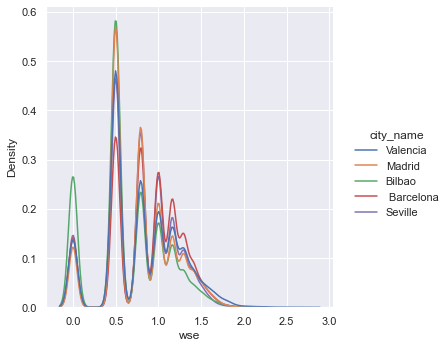

In [66]:
sns.displot(data=df_weather, x="wse", hue="city_name", kind="kde", )

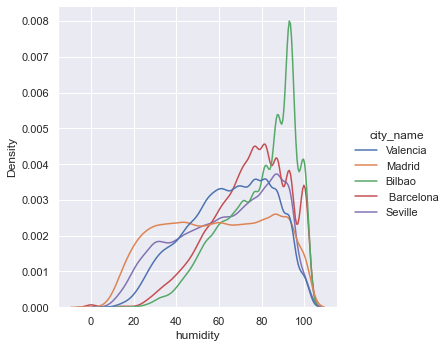

In [65]:
sns.displot(data=df_weather, x="humidity", hue="city_name", kind="kde")

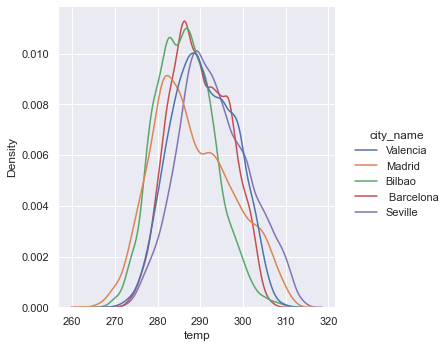

In [66]:
sns.displot(data=df_weather, x="temp", hue="city_name", kind="kde")

In [67]:
0/0

ZeroDivisionError: division by zero

### saving

global dataset

In [ ]:
df_global = df_energy.copy()
for city in weights:
    df_global = pd.merge(df_global, df_final[city].add_suffix(f'_{city}', ), how='inner', left_on='time', right_on=f'time_{city}', )

In [ ]:
df_global.to_csv('splitted/Total.csv', index=False, )
df_global.head()

,time,y_generation biomass,y_generation nuclear,y_generation other,y_generation other renewable,y_generation solar,y_generation waste,y_price actual,y_generation fossil,y_generation hydro,...,x_temp_min_Bilbao,x_temp_max_Bilbao,x_pressure_Bilbao,x_humidity_Bilbao,x_wind_speed_Bilbao,x_wind_deg_Bilbao,x_rain_1h_Bilbao,x_rain_3h_Bilbao,x_snow_3h_Bilbao,x_clouds_all_Bilbao
0,2015-01-01 00:00:00+01:00,447.0,7096.0,43.0,73.0,49.0,196.0,65.41,10156.0,3813.0,...,269.657312,269.657312,1036.0,97,0.0,226,0.0,0.0,0.0,0
1,2015-01-01 01:00:00+01:00,449.0,7096.0,43.0,71.0,50.0,195.0,64.92,10437.0,3587.0,...,269.763500,269.763500,1035.0,97,0.0,229,0.0,0.0,0.0,0
2,2015-01-01 02:00:00+01:00,448.0,7099.0,43.0,73.0,50.0,196.0,64.48,9918.0,3508.0,...,269.251688,269.251688,1036.0,97,1.0,224,0.0,0.0,0.0,0
3,2015-01-01 03:00:00+01:00,438.0,7098.0,43.0,75.0,50.0,191.0,59.32,8859.0,3231.0,...,269.203344,269.203344,1035.0,97,1.0,225,0.0,0.0,0.0,0
4,2015-01-01 04:00:00+01:00,428.0,7097.0,43.0,74.0,42.0,189.0,56.04,8313.0,3499.0,...,269.485500,269.485500,1035.0,97,1.0,221,0.0,0.0,0.0,0


local datasets

In [ ]:
for city, percent in weights.items():

    # trick di brumotti - togli la colonna, metti la colonna
    tmp = df_energy.set_index('time')
    tmp = tmp.astype(float) * percent
    tmp = tmp.reset_index()

    tmp = pd.merge(df_final[city], tmp, how='inner', left_on='time', right_on='time')

    tmp.to_csv(f'splitted/{city}.csv', index=False, )